## **Práctica 17: Clasificación COVID-19 (Adultos mayores)**

Nombre: Humberto Ignacio Hernández Olvera

No. Cuenta: 309068165

Email: humberto1nacho@gmail.com

### **Caso de estudio**

**Objetivo.** Clasificar la mortalidad de adultos mayores contagiados con COVID-19 en la Ciudad de México.

**Emplear los algoritmos:** 

* Árbol de decisión.
* Bosque aleatorio.

**Fuente de datos:**

https://www.gob.mx/salud/documentos/datos-abiertos-bases-historicas-direccion-general-de-epidemiologia

**Variables:**

No.	| Nombre | Descripción | Valores
* ID
* 1	SEXO	Identifica el sexo del paciente.	1-Mujer, 2-Hombre, 99-No Especificado
* 2	TIPO_PACIENTE	Identifica el tipo de atención que recibió el paciente.	1-Ambulatorio, 2-Hospitalizado, 99-No Especificado 
* 3	SITUACION	Identifica la situación (vivo o muerto) del paciente. 	1-Vivo 
2-Muerto
* 4	INTUBADO	Identifica si el paciente requirió de intubación.	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado
* 5	NEUMONIA	Identifica si el paciente se le diagnosticó con neumonía.	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado
* 6	EDAD	Identifica la edad del paciente.	Numérico
* 7	DIABETES	Identifica si el paciente tiene un diagnóstico de diabetes.	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado
* 8	EPOC	Identifica si el paciente tiene un diagnóstico de Enfermedad Pulmonar Obstructiva Crónica (EPOC).	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado
* 9	ASMA	Identifica si el paciente tiene un diagnóstico de asma.	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado
* 10	INMUSUPPR	Identifica si el paciente tiene un diagnóstico de inmunosupresión.	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado
* 11	HIPERTENSION	Identifica si el paciente tiene un diagnóstico de hipertensión.	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado
* 12	OTRA_COM	Identifica si el paciente tiene diagnóstico de otras enfermedades.	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado
* 13	CARDIOVASCULAR	Identifica si el paciente tiene un diagnóstico de enfermedades cardiovasculares.	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado
* 14	OBESIDAD	Identifica si el paciente tiene diagnóstico de obesidad.	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado
* 15	RENAL_CRONICA	Identifica si el paciente tiene diagnóstico de insuficiencia renal crónica.	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado
* 16	TABAQUISMO	Identifica si el paciente tiene hábito de tabaquismo.	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado
* 17	OTRO_CASO	Identifica si el paciente tuvo contacto con algún otro caso diagnosticado con SARS-CoV-2.	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado
* 18	RESULTADO_ANTIGENO	Identifica el resultado del análisis de la muestra de antígeno para SARS-CoV-2.	1-Positivo SARS-CoV-2, 2-Negativo SARS-CoV-2, 97- No Aplica (Caso sin muestra)
* 19	CLASIFICACION_FINAL	Identifica la clasificación del resultado de la prueba Covid-19: confirmado, inválido, no realizado, sospechoso y negativo.	1-Confirmado por Asociación Clínica Epidemiológica, 2-Confirmado por comité de Dictaminación, 3-Caso confirmado, 4-Inválido por laboratorio, 5-No realizado por laboratorio, 6-Caso sospechoso, 7-Negativo a SARS-CoV-2. 
* 20	UCI	Identifica si el paciente requirió ingresar a una Unidad de Cuidados Intensivos (UCI).	1-Sí, 2-No, 97-No aplica, 98-Se ignora, 99-No Especificado

### **I. Acceso a datos y selección de características**

#### **1) Acceso a los datos**

In [1]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline

In [2]:
Covid = pd.read_csv('CovidAdultosMayores.csv')
Covid

,ID,SEXO,TIPO_PACIENTE,SITUACION,INTUBADO,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,...,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,UCI
0,21,2,1,Vivo,5,2,62,2,2,2,...,1,2,2,2,2,2,2,5,6,5
1,23,1,1,Vivo,5,2,67,1,2,2,...,2,2,2,2,2,2,1,5,3,5
2,31,1,1,Vivo,5,2,62,2,2,2,...,1,2,2,1,2,2,1,1,3,5
3,39,1,1,Vivo,5,2,76,2,2,2,...,2,2,2,2,2,2,2,5,5,5
4,81,1,1,Vivo,5,2,60,2,2,2,...,2,2,2,1,2,2,2,5,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591347,15563006,1,1,Vivo,5,2,67,4,4,4,...,4,4,4,4,4,4,1,2,7,5
591348,15563010,2,1,Vivo,5,2,68,4,4,4,...,4,4,4,4,4,4,1,2,7,5
591349,15563012,2,1,Vivo,5,2,69,4,4,4,...,4,4,4,4,4,4,1,2,7,5
591350,15563014,2,1,Vivo,5,2,71,4,4,4,...,4,4,4,4,4,4,1,2,7,5


In [3]:
Covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591352 entries, 0 to 591351
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   591352 non-null  int64 
 1   SEXO                 591352 non-null  int64 
 2   TIPO_PACIENTE        591352 non-null  int64 
 3   SITUACION            591352 non-null  object
 4   INTUBADO             591352 non-null  int64 
 5   NEUMONIA             591352 non-null  int64 
 6   EDAD                 591352 non-null  int64 
 7   DIABETES             591352 non-null  int64 
 8   EPOC                 591352 non-null  int64 
 9   ASMA                 591352 non-null  int64 
 10  INMUSUPR             591352 non-null  int64 
 11  HIPERTENSION         591352 non-null  int64 
 12  OTRA_COM             591352 non-null  int64 
 13  CARDIOVASCULAR       591352 non-null  int64 
 14  OBESIDAD             591352 non-null  int64 
 15  RENAL_CRONICA        591352 non-nu

In [4]:
print(Covid.groupby('SITUACION').size())

SITUACION
Finado     34296
Vivo      557056
dtype: int64


In [5]:
Covid.describe()

,ID,SEXO,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,UCI
count,5.913520e+05,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000,591352.000000
mean,7.342283e+06,1.460714,1.117209,4.630892,1.917734,68.538033,1.812335,2.005494,2.014942,2.017462,1.718482,2.013456,1.998169,1.950273,2.011338,1.962689,1.646598,2.611008,5.631135,4.641107
std,4.373124e+06,0.498455,0.321670,1.020574,0.275912,8.773569,0.490601,0.282409,0.263831,0.258697,0.536544,0.267491,0.294227,0.362907,0.270805,0.348208,0.544160,1.458051,1.993621,0.988686
min,2.100000e+01,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.820078e+06,1.000000,1.000000,5.000000,2.000000,62.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,3.000000,5.000000
50%,6.400737e+06,1.000000,1.000000,5.000000,2.000000,66.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,7.000000,5.000000
75%,1.107690e+07,2.000000,1.000000,5.000000,2.000000,72.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000,7.000000,5.000000
max,1.556302e+07,2.000000,2.000000,5.000000,3.000000,122.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,7.000000,5.000000


#### **2) Selección de características**

A través de un mapa de calor de identifican posibles variables correlacionadas.

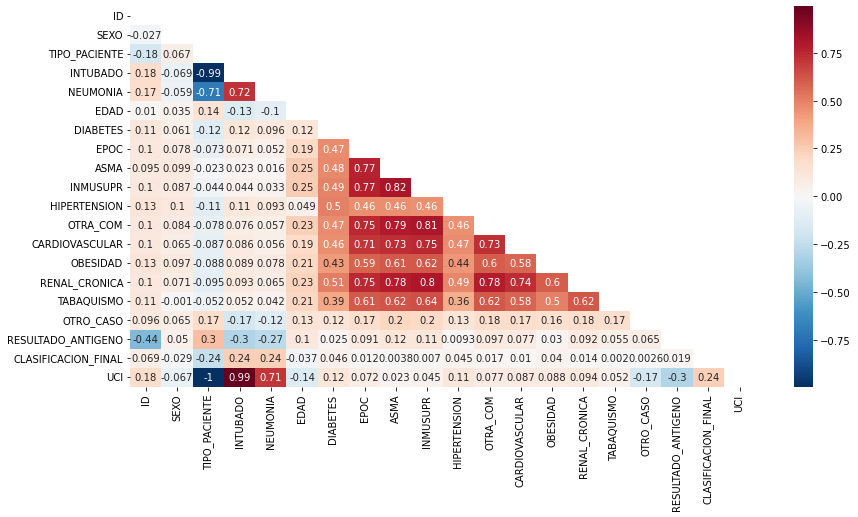

In [6]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(Covid.corr())
sns.heatmap(Covid.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

**Variables seleccionadas:**

Debido a la importancia de las variables, se considerarán todas las variables para la construcción de los modelos.

In [7]:
#Variables predictoras
X = np.array(Covid[['SEXO',
                          'TIPO_PACIENTE',
                          'INTUBADO',
                          'NEUMONIA',
                          'EDAD',
                          'DIABETES',
                          'EPOC',
                          'ASMA',
                          'INMUSUPR',
                          'HIPERTENSION',
                          'OTRA_COM',
                          'CARDIOVASCULAR',
                          'OBESIDAD',
                          'RENAL_CRONICA',
                          'TABAQUISMO', 
                          'OTRO_CASO',
                          'RESULTADO_ANTIGENO',
                          'CLASIFICACION_FINAL',
                          'UCI']])
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,2,1,5,2,62,2,2,2,2,1,2,2,2,2,2,2,5,6,5
1,1,1,5,2,67,1,2,2,2,2,2,2,2,2,2,1,5,3,5
2,1,1,5,2,62,2,2,2,2,1,2,2,1,2,2,1,1,3,5
3,1,1,5,2,76,2,2,2,2,2,2,2,2,2,2,2,5,5,5
4,1,1,5,2,60,2,2,2,2,2,2,2,1,2,2,2,5,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591347,1,1,5,2,67,4,4,4,4,4,4,4,4,4,4,1,2,7,5
591348,2,1,5,2,68,4,4,4,4,4,4,4,4,4,4,1,2,7,5
591349,2,1,5,2,69,4,4,4,4,4,4,4,4,4,4,1,2,7,5
591350,2,1,5,2,71,4,4,4,4,4,4,4,4,4,4,1,2,7,5


In [8]:
#Variable clase
Y = np.array(Covid[['SITUACION']])
pd.DataFrame(Y)

,0
0,Vivo
1,Vivo
2,Vivo
3,Vivo
4,Vivo
...,...
591347,Vivo
591348,Vivo
591349,Vivo
591350,Vivo


### **II. Creación de los modelos**

In [9]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [10]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, 
                                                                                test_size = 0.2, 
                                                                                random_state = 0,
                                                                                shuffle = True)

In [11]:
print(len(X_train))
print(len(X_validation))

473081
118271


### **Modelo 1: Árboles de decisión (AD)**

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
#Se entrena el modelo a partir de los datos de entrada
ClasificacionAD = DecisionTreeClassifier(random_state=0)
ClasificacionAD.fit(X_train, Y_train)

#ClasificacionAD = DecisionTreeClassifier(min_samples_split=8, 
#                                         min_samples_leaf=4,
#                                         random_state=0)
#ClasificacionAD.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [14]:
#Clasificación final 
Y_ClasificacionAD = ClasificacionAD.predict(X_validation)
print(Y_ClasificacionAD)

['Vivo' 'Vivo' 'Vivo' ... 'Vivo' 'Vivo' 'Vivo']


In [15]:
ValoresMod1 = pd.DataFrame(Y_validation, Y_ClasificacionAD)
ValoresMod1

,0
Vivo,Vivo
Vivo,Vivo
Vivo,Vivo
Vivo,Vivo
Vivo,Vivo
...,...
Vivo,Vivo
Vivo,Vivo
Vivo,Vivo
Vivo,Vivo


In [16]:
accuracy_score(Y_validation, Y_ClasificacionAD)

0.95173795774112

#### **Matriz de clasificación: Árbol de decisión**

In [17]:
#Matriz de clasificación
ModeloClasificacion1 = ClasificacionAD.predict(X_validation)
Matriz_Clasificacion1 = pd.crosstab(Y_validation.ravel(), 
                                   ModeloClasificacion1, 
                                   rownames=['Actual'], 
                                   colnames=['Clasificación']) 
Matriz_Clasificacion1

Clasificación,Finado,Vivo
Actual,,
Finado,4072,2758
Vivo,2950,108491


In [18]:
#Reporte de la clasificación
print('Criterio: \n', ClasificacionAD.criterion)
print('Importancia variables: \n', ClasificacionAD.feature_importances_)
print("Exactitud:", accuracy_score(Y_validation, Y_ClasificacionAD))
print(classification_report(Y_validation, Y_ClasificacionAD))

Criterio: 
 gini
Importancia variables: 
 [0.01574886 0.         0.57520321 0.0182933  0.11225247 0.02361755
 0.01307624 0.00473706 0.00839108 0.02638239 0.01352996 0.01495617
 0.01968188 0.01083606 0.0166425  0.01762308 0.01905589 0.08120132
 0.00877098]
Exactitud: 0.95173795774112
              precision    recall  f1-score   support

      Finado       0.58      0.60      0.59      6830
        Vivo       0.98      0.97      0.97    111441

    accuracy                           0.95    118271
   macro avg       0.78      0.78      0.78    118271
weighted avg       0.95      0.95      0.95    118271



In [19]:
ImportanciaMod1 = pd.DataFrame({'Variable': list(Covid[['SEXO',
                          'TIPO_PACIENTE',
                          'INTUBADO',
                          'NEUMONIA',
                          'EDAD',
                          'DIABETES',
                          'EPOC',
                          'ASMA',
                          'INMUSUPR',
                          'HIPERTENSION',
                          'OTRA_COM',
                          'CARDIOVASCULAR',
                          'OBESIDAD',
                          'RENAL_CRONICA',
                          'TABAQUISMO', 
                          'OTRO_CASO',
                          'RESULTADO_ANTIGENO',
                          'CLASIFICACION_FINAL',
                          'UCI']]),
                                'Importancia': ClasificacionAD.feature_importances_}).sort_values('Importancia', ascending=False)
ImportanciaMod1

,Variable,Importancia
2,INTUBADO,0.575203
4,EDAD,0.112252
17,CLASIFICACION_FINAL,0.081201
9,HIPERTENSION,0.026382
5,DIABETES,0.023618
12,OBESIDAD,0.019682
16,RESULTADO_ANTIGENO,0.019056
3,NEUMONIA,0.018293
15,OTRO_CASO,0.017623
14,TABAQUISMO,0.016643


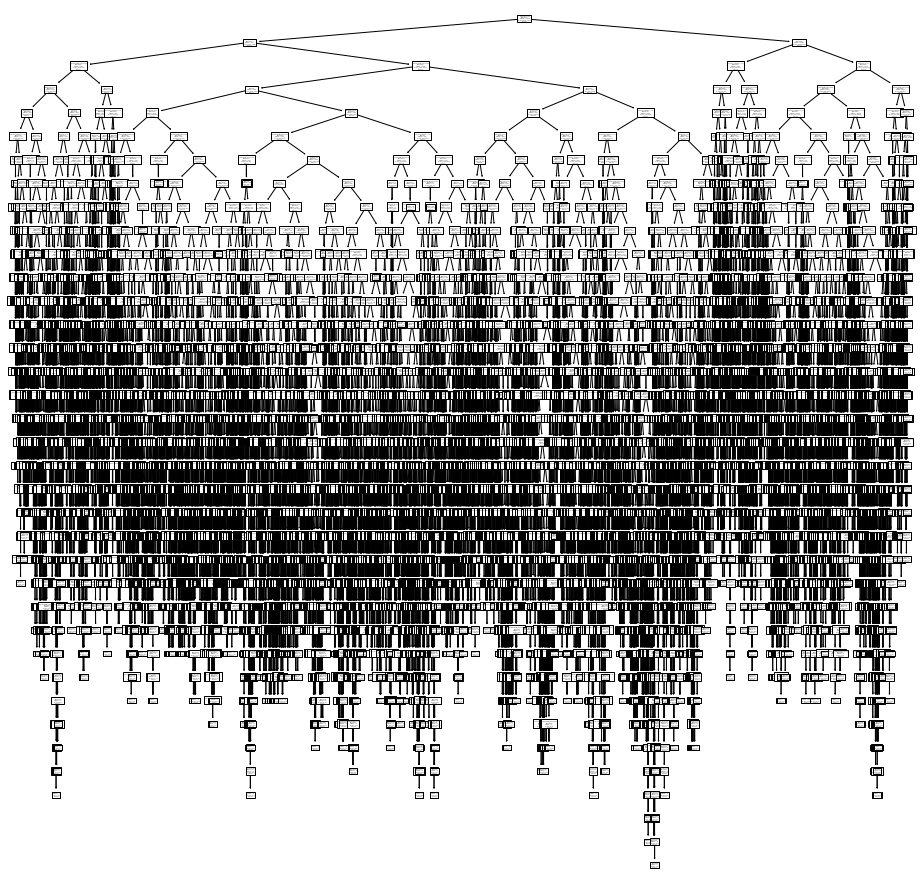

In [35]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,16))  
plot_tree(ClasificacionAD, 
          feature_names = ['SEXO',
                          'TIPO_PACIENTE',
                          'INTUBADO',
                          'NEUMONIA',
                          'EDAD',
                          'DIABETES',
                          'EPOC',
                          'ASMA',
                          'INMUSUPR',
                          'HIPERTENSION',
                          'OTRA_COM',
                          'CARDIOVASCULAR',
                          'OBESIDAD',
                          'RENAL_CRONICA',
                          'TABAQUISMO', 
                          'OTRO_CASO',
                          'RESULTADO_ANTIGENO',
                          'CLASIFICACION_FINAL',
                          'UCI'],
         class_names = ['1', '2', '3'])
plt.show()

In [34]:
from sklearn.tree import export_text
Reporte = export_text(ClasificacionAD, feature_names = ['SEXO',
                          'TIPO_PACIENTE',
                          'INTUBADO',
                          'NEUMONIA',
                          'EDAD',
                          'DIABETES',
                          'EPOC',
                          'ASMA',
                          'INMUSUPR',
                          'HIPERTENSION',
                          'OTRA_COM',
                          'CARDIOVASCULAR',
                          'OBESIDAD',
                          'RENAL_CRONICA',
                          'TABAQUISMO', 
                          'OTRO_CASO',
                          'RESULTADO_ANTIGENO',
                          'CLASIFICACION_FINAL',
                          'UCI'])
print(Reporte)

|--- INTUBADO <= 4.00
|   |--- INTUBADO <= 1.50
|   |   |--- CLASIFICACION_FINAL <= 6.50
|   |   |   |--- OTRO_CASO <= 1.50
|   |   |   |   |--- EDAD <= 67.50
|   |   |   |   |   |--- RESULTADO_ANTIGENO <= 3.50
|   |   |   |   |   |   |--- EDAD <= 66.50
|   |   |   |   |   |   |   |--- EPOC <= 1.50
|   |   |   |   |   |   |   |   |--- DIABETES <= 1.50
|   |   |   |   |   |   |   |   |   |--- class: Finado
|   |   |   |   |   |   |   |   |--- DIABETES >  1.50
|   |   |   |   |   |   |   |   |   |--- class: Vivo
|   |   |   |   |   |   |   |--- EPOC >  1.50
|   |   |   |   |   |   |   |   |--- CARDIOVASCULAR <= 1.50
|   |   |   |   |   |   |   |   |   |--- EDAD <= 61.00
|   |   |   |   |   |   |   |   |   |   |--- class: Vivo
|   |   |   |   |   |   |   |   |   |--- EDAD >  61.00
|   |   |   |   |   |   |   |   |   |   |--- EDAD <= 65.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- EDAD >  65.50
|   |   |   |   

### **Modelo 2: Bosques aleatorios (BA)**

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
ClasificacionBA = RandomForestClassifier(random_state=0)
ClasificacionBA.fit(X_train, Y_train)

#ClasificacionBA = RandomForestClassifier(n_estimators=100,
#                                         max_depth=11, 
#                                         min_samples_split=4, 
#                                         min_samples_leaf=2, 
#                                         random_state=0)
#ClasificacionBA.fit(X_train, Y_train)

C:\Users\humbe\AppData\Local\Temp\ipykernel_15660\4184477576.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ClasificacionBA.fit(X_train, Y_train)


RandomForestClassifier(random_state=0)

In [22]:
#Clasificación final 
Y_ClasificacionBA = ClasificacionBA.predict(X_validation)
print(Y_ClasificacionBA)

['Vivo' 'Vivo' 'Vivo' ... 'Vivo' 'Vivo' 'Vivo']


In [23]:
ValoresMod2 = pd.DataFrame(Y_validation, Y_ClasificacionBA)
ValoresMod2

,0
Vivo,Vivo
Vivo,Vivo
Vivo,Vivo
Vivo,Vivo
Vivo,Vivo
...,...
Vivo,Vivo
Vivo,Vivo
Vivo,Vivo
Vivo,Vivo


In [24]:
accuracy_score(Y_validation, Y_ClasificacionBA)

0.9560162677241251

#### **Matriz de clasificación: Bosques aleatorios**

In [25]:
#Matriz de clasificación
ModeloClasificacion2 = ClasificacionBA.predict(X_validation)
Matriz_Clasificacion2 = pd.crosstab(Y_validation.ravel(),
                                    ModeloClasificacion2,
                                    rownames=['Reales'],
                                    colnames=['Clasificación']) 
Matriz_Clasificacion2

Clasificación,Finado,Vivo
Reales,,
Finado,3925,2905
Vivo,2297,109144


In [26]:
#Reporte de la clasificación
print('Criterio: \n', ClasificacionBA.criterion)
print('Importancia variables: \n', ClasificacionBA.feature_importances_)
print("Exactitud:", accuracy_score(Y_validation, Y_ClasificacionBA))
print(classification_report(Y_validation, Y_ClasificacionBA))

Criterio: 
 gini
Importancia variables: 
 [0.01194389 0.14270827 0.17180165 0.08798376 0.1836613  0.01850889
 0.01018884 0.00385787 0.00585918 0.01888164 0.01002567 0.0103335
 0.01564713 0.00952607 0.01308099 0.02440216 0.02786577 0.07838914
 0.15533429]
Exactitud: 0.9560162677241251
              precision    recall  f1-score   support

      Finado       0.63      0.57      0.60      6830
        Vivo       0.97      0.98      0.98    111441

    accuracy                           0.96    118271
   macro avg       0.80      0.78      0.79    118271
weighted avg       0.95      0.96      0.96    118271



In [27]:
Importancia2 = pd.DataFrame({'Variable': list(Covid[['SEXO',
                          'TIPO_PACIENTE',
                          'INTUBADO',
                          'NEUMONIA',
                          'EDAD',
                          'DIABETES',
                          'EPOC',
                          'ASMA',
                          'INMUSUPR',
                          'HIPERTENSION',
                          'OTRA_COM',
                          'CARDIOVASCULAR',
                          'OBESIDAD',
                          'RENAL_CRONICA',
                          'TABAQUISMO', 
                          'OTRO_CASO',
                          'RESULTADO_ANTIGENO',
                          'CLASIFICACION_FINAL',
                          'UCI']]), 
                             'Importancia': ClasificacionBA.feature_importances_}).sort_values('Importancia', ascending=False)
Importancia2

,Variable,Importancia
4,EDAD,0.183661
2,INTUBADO,0.171802
18,UCI,0.155334
1,TIPO_PACIENTE,0.142708
3,NEUMONIA,0.087984
17,CLASIFICACION_FINAL,0.078389
16,RESULTADO_ANTIGENO,0.027866
15,OTRO_CASO,0.024402
9,HIPERTENSION,0.018882
5,DIABETES,0.018509


### **III. Validación**

In [28]:
print("Árbol de decisión:", accuracy_score(Y_validation, Y_ClasificacionAD))
print("Bosque aleatorio:", accuracy_score(Y_validation, Y_ClasificacionBA))

Árbol de decisión: 0.95173795774112
Bosque aleatorio: 0.9560162677241251


In [29]:
#Rendimiento
from sklearn.preprocessing import label_binarize
y_score = ClasificacionBA.predict_proba(X_validation)
y_test_bin = label_binarize(Y_validation, classes=[1, 
                                                   2, 
                                                   3])
n_classes = y_test_bin.shape[1]

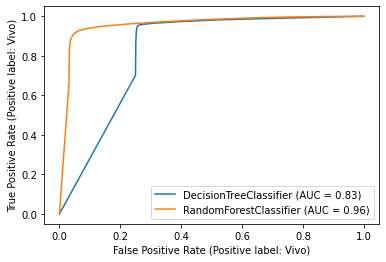

In [31]:
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics
fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(ClasificacionAD,
                               X_validation,
                               Y_validation,
                               ax = ax)
metrics.RocCurveDisplay.from_estimator(ClasificacionBA,
                                         X_validation,
                                         Y_validation,
                                         ax = ax)
plt.show()

In [32]:
#Paciente
PacienteAD = pd.DataFrame({'SEXO':[120],
                          'TIPO_PACIENTE':[0],
                          'INTUBADO':[0],
                          'NEUMONIA':[0],
                          'EDAD':[2],
                          'DIABETES':[1],
                          'EPOC':[0],
                          'ASMA':[45],
                          'INMUSUPR':[3],
                          'HIPERTENSION':[6],
                          'OTRA_COM':[90],
                          'CARDIOVASCULAR':[1],
                          'OBESIDAD':[3],
                          'RENAL_CRONICA':[3],
                          'TABAQUISMO':[0], 
                          'OTRO_CASO':[0],
                          'RESULTADO_ANTIGENO':[13],
                          'CLASIFICACION_FINAL':[14],
                          'UCI':[0]})
ClasificacionBA.predict(PacienteAD)

D:\Programs\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array(['Finado'], dtype=object)

In [33]:
#Paciente
PacienteBA = pd.DataFrame({'SEXO':[120],
                          'TIPO_PACIENTE':[0],
                          'INTUBADO':[0],
                          'NEUMONIA':[0],
                          'EDAD':[2],
                          'DIABETES':[1],
                          'EPOC':[0],
                          'ASMA':[45],
                          'INMUSUPR':[3],
                          'HIPERTENSION':[6],
                          'OTRA_COM':[90],
                          'CARDIOVASCULAR':[1],
                          'OBESIDAD':[3],
                          'RENAL_CRONICA':[3],
                          'TABAQUISMO':[0], 
                          'OTRO_CASO':[0],
                          'RESULTADO_ANTIGENO':[13],
                          'CLASIFICACION_FINAL':[14],
                          'UCI':[0]})
ClasificacionBA.predict(PacienteBA)

D:\Programs\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array(['Finado'], dtype=object)

Con ambos modelos, se determina el mismo resultado para ese paciente, esto muy probablemente debido a que ambos modelos tienen una precisión con una diferencia muy ligera.